# Tuning LSTM Hyperparameters with Keras for Time Series Forecasting

### After running the experiment, the RMSE for the train and the test sets at the end of each of the 10 experimental runs for 0-5 Neurons and 2^0-2^12 Epochs were saved to a csv file upon which the diagnostics will be performed here to investigate model configurations.

In [326]:
# import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
import string
from sklearn.metrics import mean_squared_error
import scipy.stats
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load data from csv containing the results of the experimental runs -
## (Alt_Fuel_ML_Monthly_LSTM_HyperparameterTuning.ipynb contains the results)

In [327]:
results_df = pd.read_csv('alt_fuels_hyperparameter_tuning.csv',parse_dates = True, error_bad_lines=False,low_memory=False)

In [328]:
res_df = results_df[['neurons','epochs','repeats','trainRMSE','testRMSE']]

In [329]:
res_df

,neurons,epochs,repeats,trainRMSE,testRMSE
0,1,1,0,117.171043,181.156847
1,1,1,1,107.816985,167.059771
2,1,1,2,139.497950,214.818166
3,1,1,3,112.237009,173.493713
4,1,1,4,105.891294,163.831630
...,...,...,...,...,...
645,5,4096,5,68.440209,158.673893
646,5,4096,6,89.811060,232.169025
647,5,4096,7,70.876083,156.186867
648,5,4096,8,76.415816,145.934886


In [330]:
res_df.describe()

,neurons,epochs,repeats,trainRMSE,testRMSE
count,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.000000,630.076923,4.500000,93.399313,160.317795
std,1.415303,1151.426426,2.874493,22.890339,33.583042
min,1.000000,1.000000,0.000000,53.517538,123.714385
25%,2.000000,8.000000,2.000000,76.285014,141.201113
50%,3.000000,64.000000,4.500000,91.440829,155.964976
75%,4.000000,512.000000,7.000000,109.556437,173.884924
max,5.000000,4096.000000,9.000000,453.104056,622.907872


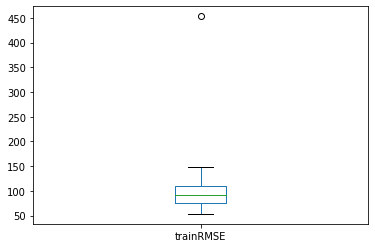

In [331]:
# box plot to view overall range of trainRMSE
res_df['trainRMSE'].plot(kind='box')

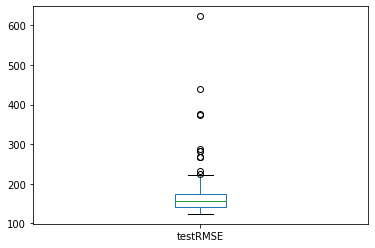

In [332]:
# box plot to view overall range of testRMSE
res_df['testRMSE'].plot(kind='box')

# Tuning the number of Neurons(1-5) and Epochs(2^0-2^12)

## Diagnostic of 1 to 5 neurons 
### A line plot of the series of RMSE scores on the train and test sets for each set of neurons is created.

<Figure size 432x288 with 0 Axes>

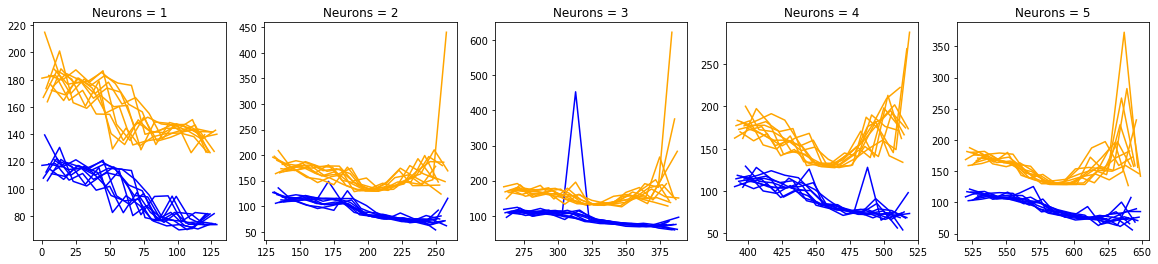

In [355]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 4))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)
ax_list=[ax1, ax2, ax3, ax4,ax5]
for x in range(5):    
    for i in range(10):
        ax_list[x].plot(res_df[(res_df['neurons']==x+1) & (res_df['repeats']==i)]['trainRMSE'], color='blue',label='trainRMSE')
        ax_list[x].plot(res_df[(res_df['neurons']==x+1) & (res_df['repeats']==i)]['testRMSE'], color='orange',label='testRMSE')
    ax_list[x].set(title="Neurons = "+str(x+1))     
    ax_list[x].plot()    

## Diagnostic of 2^0 to 2^12 Epochs 
### A line plot of the series of RMSE scores on the train and test sets for each set of neurons for each epoch is created.

<Figure size 432x288 with 0 Axes>

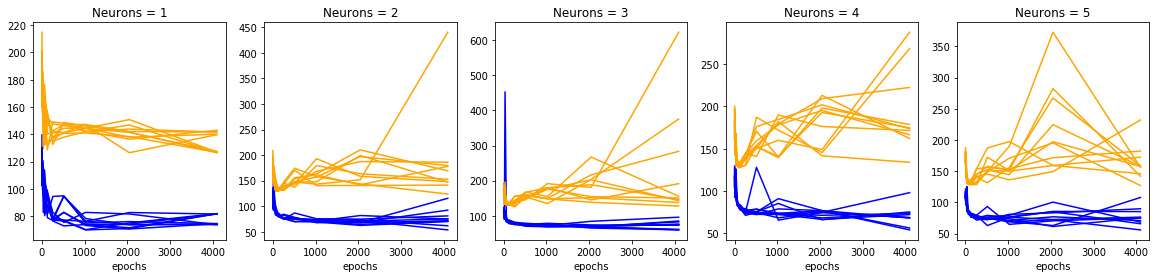

In [356]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 4))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)
ax_list=[ax1, ax2, ax3, ax4,ax5]
for x in range(5):    
    for i in range(10):
        ax_list[x].plot(res_df[(res_df['neurons']==x+1) & (res_df['repeats']==i)]['epochs'],res_df[(res_df['neurons']==x+1) & (res_df['repeats']==i)]['trainRMSE'], color='blue')
        ax_list[x].plot(res_df[(res_df['neurons']==x+1) & (res_df['repeats']==i)]['epochs'],res_df[(res_df['neurons']==x+1) & (res_df['repeats']==i)]['testRMSE'], color='orange')
    ax_list[x].set(title="Neurons = "+str(x+1))   
    ax_list[x].set_xlabel("epochs")
    ax_list[x].plot()

In [335]:
a = pd.DataFrame(res_df)

In [336]:
a.columns

Index(['neurons', 'epochs', 'repeats', 'trainRMSE', 'testRMSE'], dtype='object')

In [337]:
df = (a.pivot_table(index=['neurons','repeats'],columns='epochs', values='testRMSE')
       .reset_index()
       .rename_axis(None, axis=1))
print(df)

    neurons  repeats           1           2           4           8  \
0         1        0  181.156847  183.321052  164.917898  172.203055   
1         1        1  167.059771  186.436893  169.501466  180.413167   
2         1        2  214.818166  186.113049  180.403291  160.551429   
3         1        3  173.493713  201.071505  163.154735  159.053329   
4         1        4  163.831630  187.985447  177.399002  178.856092   
5         1        5  183.129720  179.699507  187.237515  178.126393   
6         1        6  176.930894  164.722510  181.196096  175.761460   
7         1        7  172.292998  168.936454  181.198272  173.983978   
8         1        8  174.972426  184.508717  179.641543  166.403062   
9         1        9  187.751111  176.680197  178.514242  169.677661   
10        2        0  195.796258  182.685492  178.907208  181.070763   
11        2        1  197.685514  174.794204  177.750051  164.630766   
12        2        2  163.660288  175.347875  183.772771  163.27

In [338]:
from natsort import natsorted
newf = df.reindex(natsorted(newf.columns), axis=1)

In [339]:
newf

,1,2,4,8,16,32,64,128,256,512,1024,2048,4096
0,181.156847,183.321052,164.917898,172.203055,154.860899,154.604892,135.421530,148.854946,142.091753,141.197831,147.061413,126.471864,139.675567
1,167.059771,186.436893,169.501466,180.413167,173.762277,140.465505,132.463997,150.551627,140.713814,144.387701,144.448824,150.761721,126.865945
2,214.818166,186.113049,180.403291,160.551429,179.135697,129.206653,144.556973,131.421432,138.181143,140.661594,140.922117,138.259510,126.777980
3,173.493713,201.071505,163.154735,159.053329,168.726711,160.212861,161.189494,128.594236,148.991464,148.058144,141.784156,146.823789,126.794030
4,163.831630,187.985447,177.399002,178.856092,185.351616,177.290257,161.969313,156.418140,132.462437,148.613677,146.015413,141.497228,126.481712
5,183.129720,179.699507,187.237515,178.126393,186.557134,147.258843,135.491221,152.379562,134.981586,137.821479,141.962674,143.796729,141.631861
6,176.930894,164.722510,181.196096,175.761460,182.840643,177.524124,175.862091,139.992136,142.508765,147.096377,147.164844,141.999739,141.665467
7,172.292998,168.936454,181.198272,173.983978,155.569189,160.445294,132.156780,135.142857,136.691251,141.174562,144.209193,141.419973,127.454027
8,174.972426,184.508717,179.641543,166.403062,173.923648,170.854702,146.444162,152.521571,147.564583,146.455287,142.293938,136.383841,142.951718
9,187.751111,176.680197,178.514242,169.677661,178.218052,162.147243,166.864806,155.293850,136.920751,147.718328,144.444894,137.856897,140.056126


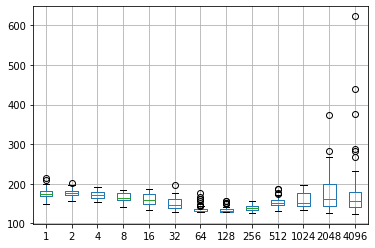

In [340]:
# boxplot to view overall range of RMSE for each epoch
newf.boxplot()

In [341]:
df[df['neurons']==1].describe()

,neurons,repeats,1,2,4,8,16,32,64,128,256,512,1024,2048,4096
count,10.0,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,4.50000,179.543728,181.947533,176.316406,171.502963,173.894587,158.001037,149.242037,145.117036,140.110755,144.318498,144.030747,140.527129,134.035443
std,0.0,3.02765,14.324521,10.257370,7.819315,7.500968,11.267573,15.670351,16.011081,10.374552,5.321473,3.822255,2.244220,6.548804,7.603850
min,1.0,0.00000,163.831630,164.722510,163.154735,159.053329,154.860899,129.206653,132.156780,128.594236,132.462437,137.821479,140.922117,126.471864,126.481712
25%,1.0,2.25000,172.593177,177.435025,171.475850,167.221712,169.985603,149.095355,135.438953,136.355177,136.748626,141.180380,142.045490,137.957550,126.812009
50%,1.0,4.50000,175.951660,183.914885,179.077892,173.093516,176.070850,160.329078,145.500567,149.703286,139.447478,145.421494,144.327044,141.458600,133.564797
75%,1.0,6.75000,182.636502,186.355932,180.997895,177.535160,181.914407,168.677837,161.774358,152.486069,142.404512,147.562840,145.623765,143.347481,141.237927
max,1.0,9.00000,214.818166,201.071505,187.237515,180.413167,186.557134,177.524124,175.862091,156.418140,148.991464,148.613677,147.164844,150.761721,142.951718


## The distributions are shown on a box and whisker plot to see how they directly compare.

### This comparison shows that the choice of setting epochs to 128 is better than the tested alternatives. It also shows that the best possible performance may be achieved with epochs between 128 and 512.
### Tuning a neural network is a tradeoff of average performance and variability of that performance, with an ideal result having a low mean error with low variability, meaning that it is generally good and reproducible.

<Figure size 432x288 with 0 Axes>

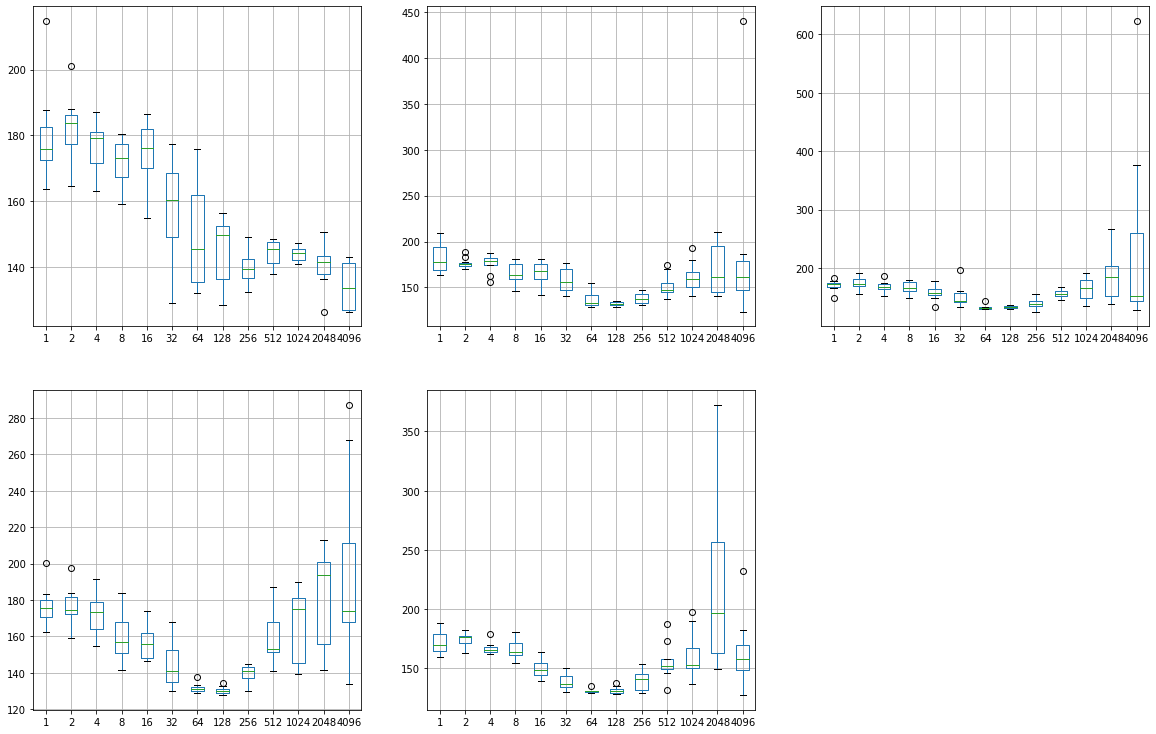

In [370]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax_list=[ax1, ax2, ax3, ax4,ax5]
for i in range(5):
    df[df['neurons']==i+1][ df.columns[df.columns!='neurons'] & df.columns[df.columns!='repeats'] ].boxplot(ax=ax_list[i])

In [351]:
df_group = df.groupby(['neurons']).mean()

In [352]:
df_group

,repeats,1,2,4,8,16,32,64,128,256,512,1024,2048,4096
neurons,,,,,,,,,,,,,,
1,4.5,179.543728,181.947533,176.316406,171.502963,173.894587,158.001037,149.242037,145.117036,140.110755,144.318498,144.030747,140.527129,134.035443
2,4.5,181.735583,176.350822,175.825733,165.229678,166.226762,157.877889,137.105458,132.211653,137.848912,152.069129,161.058701,169.261081,186.569272
3,4.5,170.350301,174.108840,167.417724,166.546551,158.579016,150.324816,132.691824,133.234635,139.896709,156.041915,163.684957,184.700825,233.266278
4,4.5,176.025395,176.182347,172.104560,158.786517,156.351783,144.774422,131.481355,130.097134,139.333244,159.397103,166.575353,182.171626,193.817633
5,4.5,171.509503,174.729199,166.690929,165.744443,149.359092,138.498329,130.555283,131.192563,139.974753,155.303036,160.037251,217.927600,163.233271


In [226]:
df_group=df_group[df_group.columns[df_group.columns!='repeats']]

### The plot below shows the lowest RMSE range being achieved with 128 epochs.

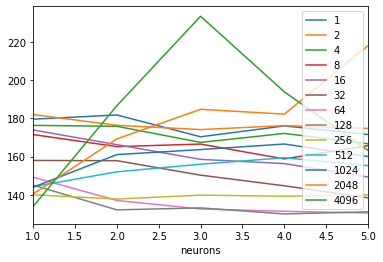

In [228]:
df_group.plot()

### From the above plots we will investigate the effect of varying the number of neurons in the network.

The number of neurons affects the learning capacity of the network. Generally, more neurons would be able to learn more structure from the problem at the cost of longer training time. More learning capacity also creates the problem of potentially overfitting the training data.

4 Neurons gives the lowest RMSE compared to the others.

## From the mean performance alone, the results suggest a network configuration with 4 neurons as having the best performance over 128 epochs with a batch size of 1. This configuration also shows the lowest RMSE and tightest variance.